In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

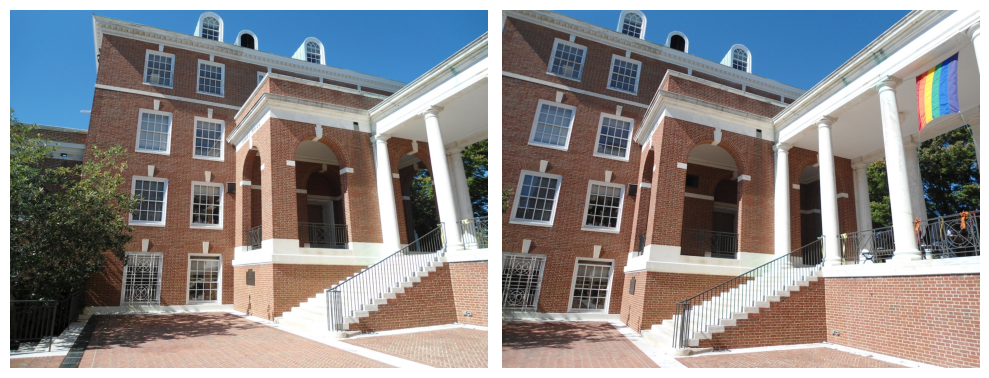

In [32]:
image_ames1 = cv2.imread('./ames1.JPG')
image_ames1 = cv2.cvtColor(image_ames1, cv2.COLOR_BGR2RGB)

image_ames2 = cv2.imread('./ames2.JPG')
image_ames2 = cv2.cvtColor(image_ames2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image_ames1)
plt.axis('off')
plt.subplot(122)
plt.imshow(image_ames2)
plt.axis('off')
plt.tight_layout()
plt.show()

# 1. Feature point detection and matching

## Exercise 1

In [9]:
def corners(image, w, kappa):
    key_points = []
    # a.
    blur = cv2.GaussianBlur(image, (w, w), 3)
    
    #b. 
    Ix = cv2.Sobel(blur, -1, 1, 0, ksize=3)
    Iy = cv2.Sobel(blur, -1, 0, 1, ksize=3)
    
    # c.
    kernel = cv2.getGaussianKernel(3, 3)
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy
    
    Ix2 = cv2.filter2D(Ix2, 0, cv2.flip(kernel, -1), borderType=cv2.BORDER_CONSTANT)
    Iy2 = cv2.filter2D(Iy2, 0, cv2.flip(kernel, -1), borderType=cv2.BORDER_CONSTANT)
    Ixy = cv2.filter2D(Ixy, 0, cv2.flip(kernel, -1), borderType=cv2.BORDER_CONSTANT)
    
    det = Ix2 * Iy2 - Ixy * Ixy
    trace = Ix2 + Iy2
    
    R = np.divide(det, trace, np.zeros_like(det, dtype="float64"), where=trace != 0)
    R = R / np.max(R)
    
    # d. 
    H2 = R > kappa
    
    # e. 
    border_size = int((w - 1) / 2)
    for i in range(border_size, image.shape[0] - border_size):
        for j in range(border_size, image.shape[1] - border_size):
            k_patch = R[(i - border_size):(i + border_size), (j - border_size):(j + border_size)]
            if H2[i, j] and R[i, j] == np.max(k_patch):
                key_points.append((i, j))
    
    return key_points

In [30]:
ames1_gray = cv2.cvtColor(image_ames1, cv2.COLOR_RGB2GRAY)
keypoint_coords = corners(ames1_gray, 3, .8)

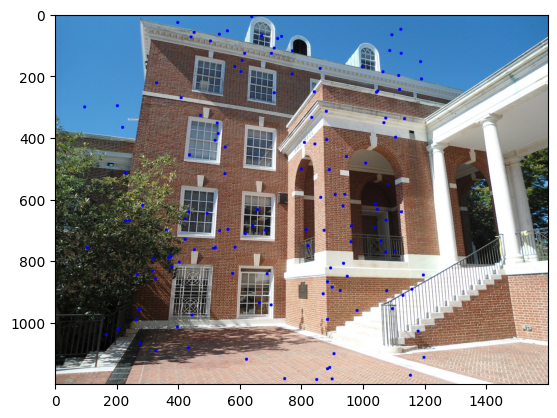

In [31]:
# Vẽ mỗi điểm lên ảnh
image_ames1 = cv2.imread('./ames1.JPG')
image_ames1 = cv2.cvtColor(image_ames1, cv2.COLOR_BGR2RGB)
for point in keypoint_coords:
    cv2.circle(image_ames1, point, 5, (0, 0, 255), -1)  # Vẽ điểm có bán kính 5, màu đỏ (0, 0, 255)

plt.imshow(image_ames1)

## Exercise 2

In [33]:
def features(image, key_points, patch_size = 9):
    descriptors = []
    border_size = int((patch_size - 1) / 2)
    img_pad = np.pad(image, pad_width=border_size, mode="constant", constant_values=0)
    for (x, y) in key_points:
        image_patch = img_pad[(x - border_size):(x + border_size + 1),
                              (y - border_size):(y + border_size + 1)]
        
        descriptors.append(image_patch.flatten())
    
    return descriptors
    

## Exercise 3

In [43]:
def matching(descriptors1, descriptors2, tau):
    match = []
    ssd_values = []
    for i in range(len(descriptors1)):
        best_match_index = -1
        best_ssd = np.inf
        for j in range(len(descriptors2)):
            ssd = np.sum((descriptors1[i] - descriptors2[j]) ** 2)
            if ssd < best_ssd:
                best_ssd = ssd
                best_match_index = j
        if best_ssd <= tau:
            match.append(best_match_index)
            ssd_values.append(np.min(ssd))
        else:
            match.append(-1)
            ssd_values.append(np.min(ssd))
            
    return match, ssd_values


In [ ]:
# def features_detector(image1, image2, w, kappa, tau):
#     image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#     image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#     print("Image 1: get corner and features")

#     im1_key= corners(image1_gray, w, kappa)
#     im1_desc= corners(image1_gray, w, kappa)
#     print(f"Image 1: number of key: {len(image1_gray)}")
    
#     im2_key= corners(image2_gray, w, kappa)
#     im2_desc= corners(image2_gray, w, kappa)
#     print(f"Image 2: number of key: {len(image2_gray)}")
    
#     print("Matching")
#     match, ssd_values = matching(im1_desc, im2_desc, tau)
#     img1_mask = image1
#     img2_mask = image2
    
#     print("Draw corner")
#     rng = np.random.default_rng(seed=10)
    
#     num_match = 0
    
#     for index, match_val in enumerate()
    
    
    
    

# 2. Line detector

## a. Apply the Canny edge detector to images: ames1.JPG

In [37]:
image = cv2.imread('./ames1.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(image, 50, 150)

## b. Apply Hough transform to the detected edges. Plot the lines estimated by Hough transform superimposed on the image.

In [36]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

image_with_lines = np.copy(image_rgb)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw lines in red


## c. Show the original image, edge map (after step 1), and final image (after step 2).

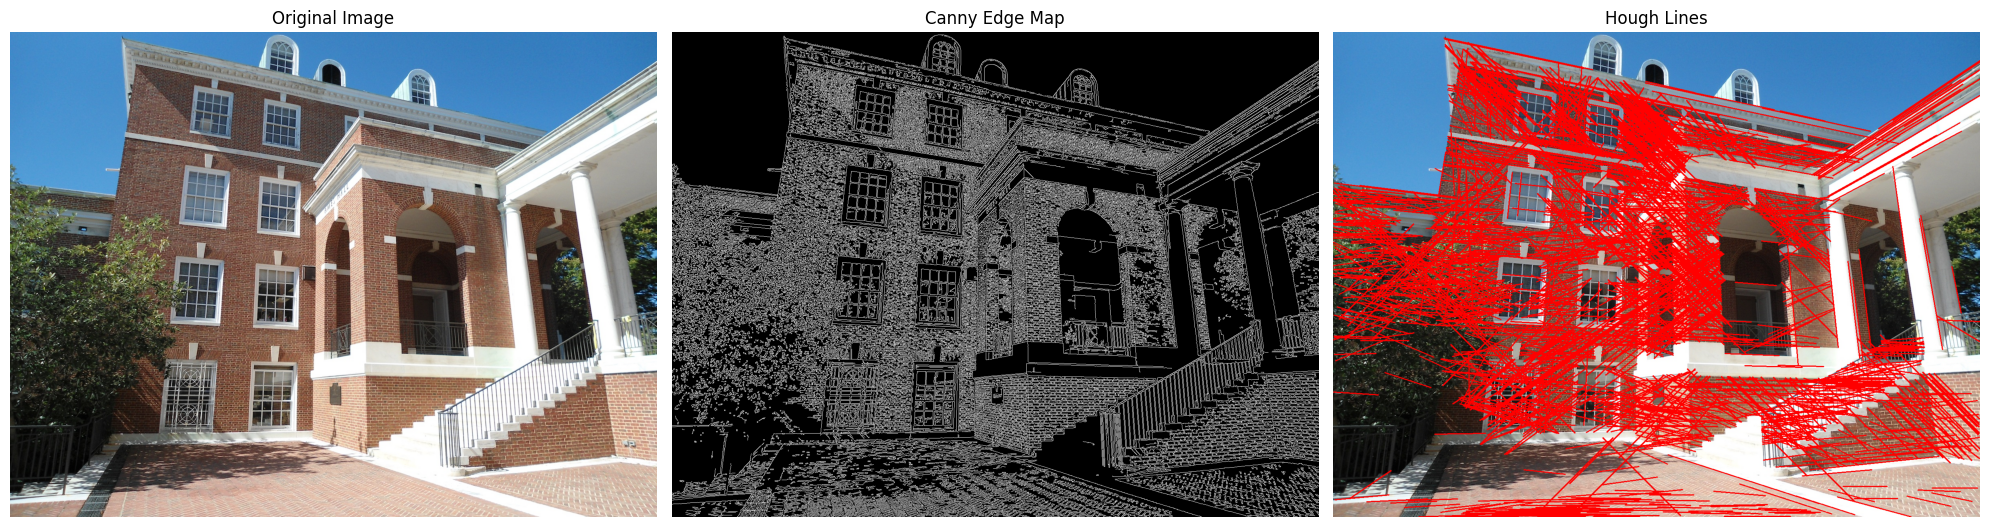

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Canny Edge Map')
axs[1].axis('off')

axs[2].imshow(image_with_lines)
axs[2].set_title('Hough Lines')
axs[2].axis('off')

plt.tight_layout()
plt.show()
